# Exercises part I

## Rolling dice

The code below extract the probability distribution for the roll of two dice. It will serve as a basis for the following exercise.

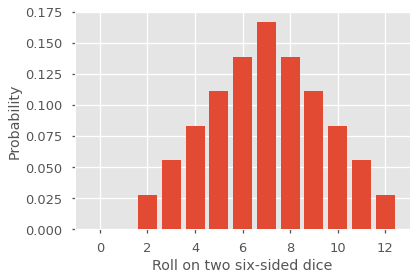

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['ggplot'])

r = 1.
g = lambda x: np.sum([x**n/6 for n in range(1,7)])
G = lambda x: g(x)**2
G = np.vectorize(G)
N = 13
n = np.arange(N)
c = r*np.exp(2*np.pi*1j*n/N)
pn = abs(np.fft.fft(G(c))/(N*r**n))
plt.bar(n,pn)
plt.ylabel('Probability')
plt.xlabel('Roll on two six-sided dice')
plt.show()

### Choosing the right support and avoiding aliasing

1. Change the value of $N$, first pick N > 13, then $N < 13$. What do you notice?
2. $n \in \{0,1,\dots,N-1\}$ is the support of your probability distribution. When $N-1$ is below 12, we have aliasing. Fix $N = 10$ and now vary $r$ between 0 and 1. What happens?
3. Instead of rolling two dice, now get the probability distribution for the sum of 3 dice. Repeat for more dice (5,10,20). What is the shape of the resulting probability distribution?

:::{note}
When adding more dice, the support of your distribution changes, adapt $N$.
:::

### More complex scenarios

1. Get the probability distribution for the sum of a six-sided die and a twelve-sided die.
2. You have dice of a very weird shape. The PGF for the roll of a single die is $g(x) = e^{x-1}$. Extract the probability distribution and make sure you eliminate aliasing effects. Do the same using two dice.

## Not rocket science

In the year 2034, the Earth is in a catastrophic state. Consequently, the Romano-Fafard, a spaceship commanded by Captain Patenaude, is set to be launched to discover another planet.

As the chief engineer, you are tasked with designing the spaceship. Importantly, you must select the 12 rocket engines for the mission.

Currently, you are reviewing the technical specifications of two prototype engines: **A**, which is fueled by Astrophage, and **B**, an antimatter-based rocket engine. Although both offer similar performances, their distributions of time to failure differ, as shown below.

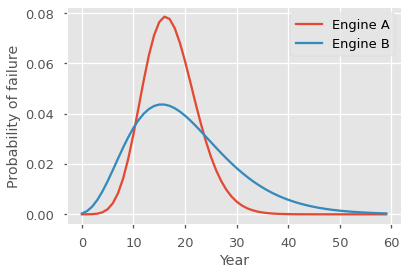

In [2]:
from scipy.stats import nbinom

t = np.arange(0,60)
pt_A = nbinom.pmf(t,32,0.65)
pt_B = nbinom.pmf(t,5,0.2)
plt.plot(t,pt_A, label='Engine A')
plt.plot(t,pt_B, label='Engine B')
plt.xlabel('Year')
plt.ylabel('Probability of failure')
plt.legend()
plt.show()

### Survival probability

Our goal is to choose between prototype **A** and **B** for the 12 engines of the spaceship. Each engine $i$ can be modeled as a random variable $X_i(t)$, where $X_i(t) = 1$ signifies that the engine is still operational at time $t$, and $X_i(t) = 0$ indicates that the engine has failed.

If the pilot Bob needs at least **4** engines to maneuver the spaceship at all time, and the mission is expected to last **20** years, which engine should you choose?

1. First, construct the PGF $g(x,t)$ for the random variable $X_i(t)$ associated with a single engine.
:::{hint}
The PGF of a Bernoulli random variable looks like $(1-p) + p x$
:::

2. From $g(x,t)$, construct the PGF $G(x,t) = \sum_{n=1}^{12} p_{n,t} x^n$ for $X(t) = \sum_{i=1}^{12} X_i(t)$. What does the distribution $p_{n,t}$ represent?
3. Determine the probability of survival with each prototype. Which choice should you make? Could you have guessed this from the distributions above?
4. If you are required to use 6 engines of type **A** and 6 engines of type **B**, calculate the probability of survival.

## Bacterial colony

A bacterial colony lives happily on an agar medium. Every 12 hours, each bacterium either divides itself into two bacteria with probability $p$, or dies with probability $(1-p)$. Therefore, after 12 hours, we have a new *generation* of bacteria, and the *offspring* of a single bacterium is either $k = 0$ or $k = 2$.

1. Construct the PGF $g(x)$ describing the offspring distribution of a single bacterium. keep $p$ as a free parameter.
2. Calculate the mean number of offsprings $\langle k \rangle$ numerically for different values of $p$. This corresponds to the *reproduction number* of the population.
3. Now assuming we start with 10 bacteria at generation 0, first construct the PGF $G(x)$ for the total offspring distribution of the population. Second, determine the distribution for the number of bacteria at generation 1 for $p = 0.25$, $p = 0.5$, and $p =  0.75$. What is the *probability of extinction* at generation 1?
4. What will happen in later generations? Can you construct the PGF associated with the number of bacteria at generation 2?